<a href="https://colab.research.google.com/github/KseniyaBarinova/Machine-learning/blob/main/1_assesment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №1

Датасет: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


Задание:

1. Найдите среднее значение, медиану, дисперсию и стандартное отклонение для каждого из признаков: `math score`, `reading score`, `writing score`. Дисперсию и стандартное отклонение необходимо найти без использования полностью готовых функций. (2 балла)

2. Проверьте данные на наличие пустых значений. Если такие значения найдены, выберите способ их замены (например, средним значением, медианой или удалением строк с пустыми значениями) и выполните замену. (2 балла)

3. Найдите выбросы в данных с использованием z-оценки или интерквартильного размаха (IQR). Напишите алгоритм для обнаружения выбросов, который не использует полностью готовые функции для этого. Выберите способ избавления от выбросов (например, удаление выбросов или замена их на среднее значение) и выполните соответствующие действия. (3 балла)

5. На выбор реализуйте собственную функцию подсчета корреляции Пирсона, Кендалла или Спирмена. Найдите попарную корреляцию между признаками `math score`, `reading score` и `writing score`. Определите, есть ли значимая корреляция между ними, и объясните результаты. (3 балла)


In [1]:
from pathlib import Path # библиотека для работы с файлами

from matplotlib import pyplot as plt # библиотека для визуализации

import pandas as pd
from scipy import stats
import numpy as np
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
data_path = Path('/content/gdrive/MyDrive/ML_part2/Lesson_2')
train_path = data_path / 'StudentsPerformance.csv'

train_dataset = pd.read_csv(train_path)

In [11]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
train_dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Найдите среднее значение, медиану, дисперсию и стандартное отклонение для каждого из признаков: math score, reading score, writing score. Дисперсию и стандартное отклонение необходимо найти без использования полностью готовых функций. (2 балла)

In [58]:
df = pd.DataFrame(train_dataset)

math_score = df['math score']
reading_score = df ['reading score']
writing_score = df ['writing score']

In [30]:
def mean(xs):
    '''Среднее значение числового ряда'''
    return sum(xs) / len(xs)

In [29]:
def median(xs):
    '''Медиана числового ряда'''
    n = len(xs)
    mid = n // 2
    if n % 2 == 1:
        return sorted(xs)[mid]
    else:
        return mean( sorted(xs)[mid-1:][:2] )

In [65]:
def variance(xs):
    '''Дисперсия (варианс) числового ряда,
       несмещенная дисперсия при n <= 30'''
    mu = mean(xs)
    n = len(xs)
    n = n-1 if n in range(1, len(xs)) else n
    square_deviation = lambda x : (x - mu) ** 2
    return sum( map(square_deviation, xs) ) / n

In [71]:
print (mean(math_score))
print (median(math_score))
print (variance (math_score))
print (np.average(math_score)) #стандартное отклонение

66.089
66.0
229.68907900000048
66.089


In [72]:
print (mean(reading_score))
print (median(reading_score))
print (variance (reading_score))
print (np.average(reading_score)) #стандартное отклонение

69.169
70.0
212.9524390000001
69.169


In [73]:
print (mean(writing_score))
print (median(writing_score))
print (variance(writing_score))
print (np.average(writing_score)) #стандартное отклонение

68.054
69.0
230.6770839999997
68.054


2. Проверьте данные на наличие пустых значений. Если такие значения найдены, выберите способ их замены (например, средним значением, медианой или удалением строк с пустыми значениями) и выполните замену. (2 балла)

In [7]:
def get_number_of_missing_values(data: pd.Series) -> dict[str, int]:
    """Данная функция должна подсчитывать количество пустых ячеек в каждой из колонок"""
    result_dict = {}

    for label, content in data.items():
        result_dict[label] = sum(pd.isna(content))
    return result_dict

In [8]:
get_number_of_missing_values(train_dataset)

{'gender': 0,
 'race/ethnicity': 0,
 'parental level of education': 0,
 'lunch': 0,
 'test preparation course': 0,
 'math score': 0,
 'reading score': 0,
 'writing score': 0}

In [9]:
def get_basic_metrics(data: pd.Series) -> dict[str, float]:
    """
    Данная функция должна считать метрики `mean`, `median`, `mode`, `variance`, `std`, `Q1`,`Q2`,`Q3`,`Q4`
    и возвращать словарь со значениями
    """
    result_dict = {}

    result_dict['mean'] = np.mean(data)
    result_dict['median'] = np.median(data)
    result_dict['mode'] = stats.mode(data)
    result_dict['variance'] = np.var(data)
    result_dict['STD'] = np.std(data)
    result_dict['Q1'] = np.quantile(data, 0.25)
    result_dict['Q2'] = np.quantile(data, 0.5)
    result_dict['Q3'] = np.quantile(data, 0.75)
    result_dict['Q4'] = np.quantile(data, 1)
    return result_dict

In [13]:
subset = train_dataset['math score']
get_basic_metrics(subset)

{'mean': 66.089,
 'median': 66.0,
 'mode': ModeResult(mode=65, count=36),
 'variance': 229.68907899999996,
 'STD': 15.155496659628149,
 'Q1': 57.0,
 'Q2': 66.0,
 'Q3': 77.0,
 'Q4': 100}

In [14]:
def get_metrics(data: pd.Series) -> dict[str, float]:
    """
    Данная функция должна считать метрики `mean`, `median`, `mode`, `variance`, `std`, `Q1`,`Q2`,`Q3`,`Q4`
    и возвращать словарь со значениями, учитывая пустые значения
    """
    result_dict = {}

    cropped_data = data.dropna()

    result_dict['mean'] = np.mean(cropped_data)
    result_dict['median'] = np.median(cropped_data)
    result_dict['mode'] = stats.mode(cropped_data).mode
    result_dict['variance'] = np.var(cropped_data)
    result_dict['STD'] = np.std(cropped_data)
    result_dict['Q1'] = np.quantile(cropped_data, 0.25)
    result_dict['Q2'] = np.quantile(cropped_data, 0.5)
    result_dict['Q3'] = np.quantile(cropped_data, 0.75)
    result_dict['Q4'] = np.quantile(cropped_data, 1)
    return result_dict

In [15]:
original_result = get_metrics(subset)
original_result

{'mean': 66.089,
 'median': 66.0,
 'mode': 65,
 'variance': 229.68907899999996,
 'STD': 15.155496659628149,
 'Q1': 57.0,
 'Q2': 66.0,
 'Q3': 77.0,
 'Q4': 100}

In [16]:
def fill_empty_values(data: pd.Series, value: float) -> pd.Series:
    return data.fillna(value)

In [17]:
def print_dicts_comparison(dict1: dict[str, float], dict2: dict[str, float]) -> None:
    for metric_name in dict1.keys():
        print(f'{metric_name}: {dict1[metric_name]} -> {dict2[metric_name]}')

In [18]:
value = get_metrics(subset)['median']

filled_subset = fill_empty_values(subset, value)

print_dicts_comparison(original_result, get_metrics(filled_subset))

mean: 66.089 -> 66.089
median: 66.0 -> 66.0
mode: 65 -> 65
variance: 229.68907899999996 -> 229.68907899999996
STD: 15.155496659628149 -> 15.155496659628149
Q1: 57.0 -> 57.0
Q2: 66.0 -> 66.0
Q3: 77.0 -> 77.0
Q4: 100 -> 100


3. Найдите выбросы в данных с использованием z-оценки или интерквартильного размаха (IQR). Напишите алгоритм для обнаружения выбросов, который не использует полностью готовые функции для этого. Выберите способ избавления от выбросов (например, удаление выбросов или замена их на среднее значение) и выполните соответствующие действия. (3 балла)

In [19]:
def get_interquartile_range_mask(data: pd.Series) -> pd.Series:
    """
    Данная функция должна считать квартили, считать верхнюю и нижнюю границу и возвращать маску
    """
    cropped_data = data.dropna()

    quartile_1 = np.quantile(cropped_data, 0.25)
    quartile_3 = np.quantile(cropped_data, 0.75)

    difference_quartile = quartile_3 - quartile_1

    left_bound = quartile_1 - 1.5 * difference_quartile
    right_bound = quartile_3 + 1.5 * difference_quartile

    outliers_mask = (data < left_bound) | (data > right_bound)
    return outliers_mask

In [20]:
outlier_mask = get_interquartile_range_mask(subset)

In [21]:
outlier_mask

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [22]:
sum(outlier_mask)

8

Способ избавления от выбрасов - удаление выбросов

<Axes: ylabel='math score'>

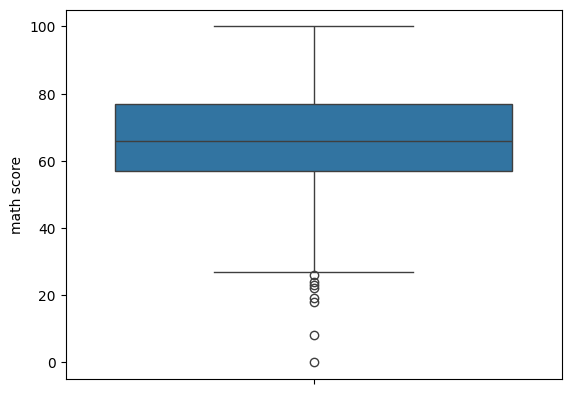

In [77]:
# Box Plot
import seaborn as sns
sns.boxplot(train_dataset['math score'])


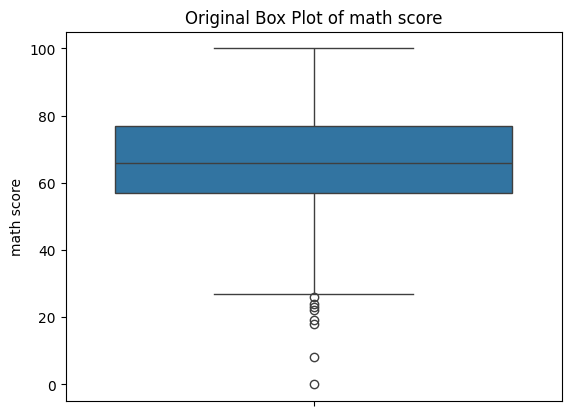

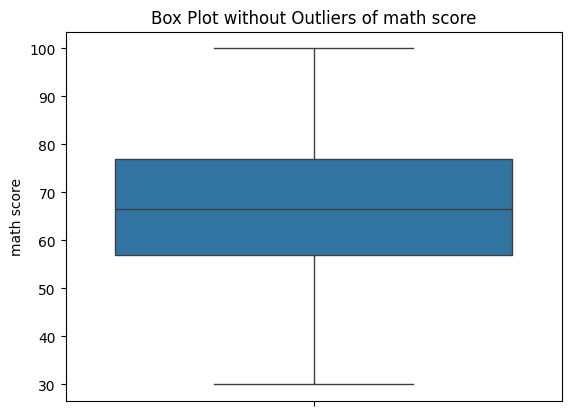

In [78]:
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] >= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 30

no_outliers = removal_box_plot(train_dataset, 'math score', threshold_value)

4. На выбор реализуйте собственную функцию подсчета корреляции Пирсона, Кендалла или Спирмена. Найдите попарную корреляцию между признаками math score, reading score и writing score. Определите, есть ли значимая корреляция между ними, и объясните результаты. (3 балла)

In [86]:
import math
def average(x):
    assert len(x) > 0
    return float(sum(x)) / len(x)


In [89]:
def pearson_correlation(x, y):
    assert len(x) == len(y)
    n = len(x)
    assert n > 0
    avg_x = average(x)
    avg_y = average(y)
    diffprod = 0
    xdiff2 = 0
    ydiff2 = 0
    for idx in range(n):
        xdiff = x[idx] - avg_x
        ydiff = y[idx] - avg_y
        diffprod += xdiff * ydiff
        xdiff2 += xdiff * xdiff
        ydiff2 += ydiff * ydiff

    return diffprod / math.sqrt(xdiff2 * ydiff2)

In [90]:
pearson_r = pearson_correlation(math_score, reading_score)
print("Коэффициент корреляции Пирсона:", pearson_r)

Коэффициент корреляции Пирсона: 0.8175796636720533


In [75]:
pearson_r = pearson_correlation(math_score, writing_score)
print("Коэффициент корреляции Пирсона:", pearson_r)

Коэффициент корреляции Пирсона: 0.8026420459498071


In [76]:
pearson_r = pearson_correlation(reading_score, writing_score)
print("Коэффициент корреляции Пирсона:", pearson_r)

Коэффициент корреляции Пирсона: 0.9545980771462474


Коэффициент корреляции Пирсона (r-Пирсона) применяется для исследования взаимосвязи двух переменных, измеренных в метрических шкалах на одной и той же выборке. Он позволяет определить, насколько пропорциональная изменчивость двух переменных.
Из этого высказывани можно сделать вывод что reading_score и writing_score обладают большей линейной взаимосвязью по сравнению с остальными парами, но у них у всех достаточно сильная взаимосвязь,  а именно больше 0.8
